# Statistics & Public Health 1
### Audrey Gilbreath
#### 8/2/22
<a id = 'title'></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm

mos = pd.read_csv('mosquito_data.csv')

## Part 1 - Basic Data Wrangling

### Question 1
##### Finding shape of dataframe

In [6]:
mos.shape

(18495, 13)

### Question 2
##### Convert dataypes to proper types.

Check datatype of 'Date' column

In [7]:
mos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


'Date' column is object datatype. Will convert it to datetime datatype

In [8]:
mos['Date'] = pd.to_datetime(mos['Date'])

mos.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


### Question 3
##### Explore the dataypes and distribution of 'Week' and 'Block' (numerical columns), and 'Trap Type' and 'WNV Present' (categorical columns)

In [9]:
print(f" Week Info: {mos['Week']} \n \
      \n Block Info: {mos['Block']}\n \
      \n Trap Type Info: {mos['Trap type']}\n \
      \n WNV Present Info: {mos['WNV Present']}")

# I prefer f-strings
# \n to go to a new line for each column.


 Week Info: 0        39
1        39
2        39
3        39
4        39
         ..
18490    36
18491    34
18492    30
18493    33
18494    33
Name: Week, Length: 18495, dtype: int64 
       
 Block Info: 0        100
1         52
2         58
3         39
4        131
        ... 
18490      3
18491     46
18492    127
18493     20
18494    100
Name: Block, Length: 18495, dtype: int64
       
 Trap Type Info: 0          GRAVID
1          GRAVID
2          GRAVID
3          GRAVID
4          GRAVID
           ...   
18490      GRAVID
18491      GRAVID
18492      GRAVID
18493    SENTINEL
18494      GRAVID
Name: Trap type, Length: 18495, dtype: object
       
 WNV Present Info: 0        negative
1        negative
2        negative
3        negative
4        negative
           ...   
18490    positive
18491    positive
18492    positive
18493    positive
18494    positive
Name: WNV Present, Length: 18495, dtype: object


The Week and Block columns' data types are both int64.
The Trap type and WNV Present columns' data types are both object

### Question 4
##### Clean up duplicate columns

- The Week column is duplicate information since we figure out how far along in the year it is from the Date column and we can judge if two dates are close in time by using the Date column as well.


- The Block column information is apart of the Address column.

- Species and Mosquito ID are convey the same information

In [10]:
#Saving Species and Mosquito ID as a key.

mosid = mos.loc[:, ['Mosquito ID', 'Species']]

mosid

,Mosquito ID,Species
0,Res,CULEX RESTUANS
1,Res,CULEX RESTUANS
2,Res,CULEX RESTUANS
3,Res,CULEX RESTUANS
4,Res,CULEX RESTUANS
...,...,...
18490,Pip,CULEX PIPIENS
18491,Pip,CULEX PIPIENS
18492,Res,CULEX RESTUANS
18493,Res,CULEX RESTUANS


In [11]:
mos = mos.drop(['Week', 'Block', 'Species'], axis = 1)
mos.head()

,Year,Address Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Lat,Lon
0,2019,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,NaN,NaN
1,2019,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,41.798211,-87.736925
2,2019,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,41.987245,-87.689417
3,2019,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,41.953664,-87.724987
4,2019,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,41.657069,-87.546049


### Question 5
##### Clean up NaN, na, and null values

In [12]:
mos.isna().sum()

Year                  0
Address Block         0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Lat                2924
Lon                2924
dtype: int64

There is missing information in the 'Lat' and 'Lon' columns. Since none of the questions being asked and answered for this report pertain to location at this time and don't need to deal with it currently.

In [13]:
mos.fillna(0)

,Year,Address Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Lat,Lon
0,2019,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,0.000000,0.000000
1,2019,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,41.798211,-87.736925
2,2019,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,41.987245,-87.689417
3,2019,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,41.953664,-87.724987
4,2019,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,41.657069,-87.546049
...,...,...,...,...,...,...,...,...,...,...
18490,2016,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,41.857843,-87.635858
18491,2007,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,41.965376,-87.758403
18492,2016,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,41.662395,-87.590176
18493,2017,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,Res,positive,41.919197,-87.664758


## Part 2

### Question 1
##### Create a visualization to explore the relationship between mosquito  numbers and date

Since this report's goal is to study the spread and current state of the West Nile Virus, we will look at the date by the year so that we can then further explore the prevalence of WNV over time.

In [14]:
mos['Year'] = mos['Date'].dt.year

print(f"{mos['Year'].value_counts()} \n \n\
        value_counts().values: {mos['Year'].value_counts().values} \n \n\
        value_counts().index: {mos['Year'].value_counts().index}")

2007    2141
2014    2000
2016    1844
2013    1624
2010    1397
2012    1392
2018    1361
2019    1209
2015    1178
2009    1135
2011    1120
2017    1110
2008     984
Name: Year, dtype: int64 
 
        value_counts().values: [2141 2000 1844 1624 1397 1392 1361 1209 1178 1135 1120 1110  984] 
 
        value_counts().index: Int64Index([2007, 2014, 2016, 2013, 2010, 2012, 2018, 2019, 2015, 2009, 2011,
            2017, 2008],
           dtype='int64')


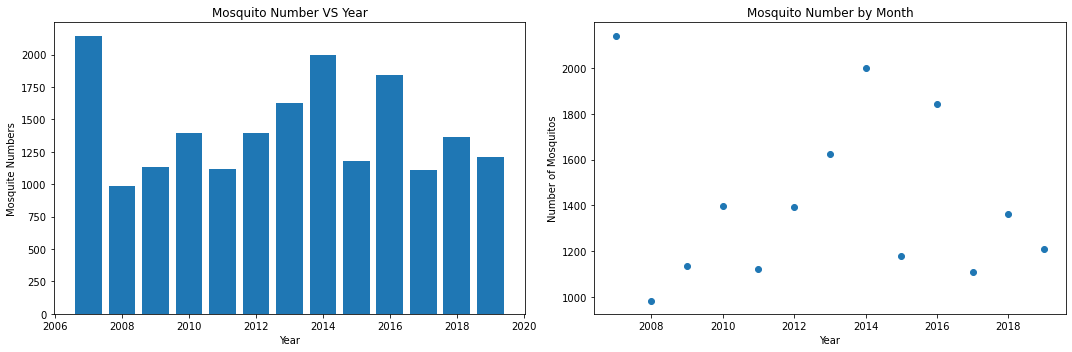

In [15]:
plt.subplots(1, 2, figsize = [15, 5])

plt.subplot(1, 2, 1)
plt.bar(mos['Year'].value_counts().index, 
        mos['Year'].value_counts().values)
plt.title('Mosquito Number VS Year')
plt.xlabel("Year")
plt.ylabel("Mosquite Numbers")

plt.subplot(1, 2, 2)
plt.scatter(mos['Year'].value_counts().index, 
           mos['Year'].value_counts().values)
plt.title("Mosquito Number by Month")
plt.xlabel("Year")
plt.ylabel("Number of Mosquitos")

plt.tight_layout()
plt.show()

## Part 3

### Question 1
##### Explore the relationship between mosquito species and West Nice Virus presence

First I'll make a dataframe to isolate information and to create aliases for longer chunks of code:

1. Check the `value_count()` for 'WNV Present' and 'Mosquito ID'. Check for missing data
2. Create a dataframe shell
3. Write code for isolating rows based on 'Mosquito ID' and 'WNV Present'
4. Write code for counting number of rows based on 'Mosquito ID' and 'WNV PResent'
5. Write a for-loop to funnel counts into proper cells

In [16]:
#Step 1.1 Check the `value_count()` for 'WNV Present' and 'Mosquito ID'. Check for missing data.

print(mos.shape[0], '\n')

print(mos['WNV Present'].value_counts().sum(), '\n')

print(mos['Mosquito ID'].value_counts().sum(), '\n')

18495 

18495 

18495 



In [17]:
#Step 1.2 Create a dataframe shell

wnvdf = pd.DataFrame(index = mos['WNV Present'].value_counts().index, #rows are the WNV result
                     columns = mos['Mosquito ID'].value_counts().index) #columns are the species

print(wnvdf)

          Res  Pip  Ter  Sal
negative  NaN  NaN  NaN  NaN
positive  NaN  NaN  NaN  NaN


In [18]:
#Step 1.3 Write code for isolating rows based on 'Mosquito ID' and 'WNV Present'
#Step 1.4 Write code for counting number of rows based on 'Mosquito ID' and 'WNV PResent'

wnvRN = mos[
    (mos['Mosquito ID'] == mos['Mosquito ID'].value_counts().index[0]) & 
                #calling the rows with the same value as index[0] which is 'Res'
    (mos['WNV Present'] == mos['WNV Present'].value_counts().index[0])
                #calling the rows with the same value as index[0] which is 'negative'

].shape[0] #counting the number of rows that meet the above condition

wnvRN

9309

In [19]:
#Step 1.5 Write a for-loop to funnel counts into proper cells

for x in range(len(mos['Mosquito ID'].value_counts().index)):   # loop for each Mosquito ID/column in wnvdf
    
    if x == mos['Mosquito ID'].index[x]: # funnelling the loop into the proper Mosquito ID column
        
        for n in range(len(mos['WNV Present'].value_counts().index)): # loop for each WNV Presence/row in wnvdf
            
            if n == mos['WNV Present'].index[n]: # funnelling the loop into the proper WNV row.
#The lines of code above ultimately funnel into a cell that has the same indices as the x and n from the for-loops 
                
                count = mos[   # counting the number of rows funnelling into a cell after going throug the loops
                    (mos['Mosquito ID'] == mos['Mosquito ID'].value_counts().index[x]) & 
                    (mos['WNV Present'] == mos['WNV Present'].value_counts().index[n])].shape[0]
                
                wnvdf.loc[mos['WNV Present'].value_counts().index[n], 
                             mos['Mosquito ID'].value_counts().index[x]] = count 
                    #defining a cell's value as the count funnelled into it
                    
print(wnvdf)
        


           Res   Pip  Ter  Sal
negative  9309  4074  903  215
positive  2557  1412   14   11


I will use a double bar graph to compare the prevelance of the West Nile Virus between species.

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

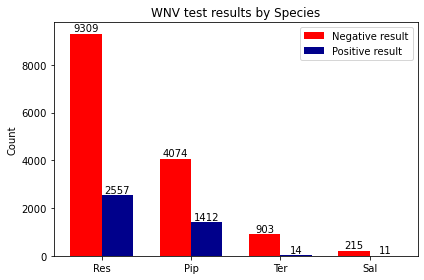

In [20]:
labels = mos['Mosquito ID'].value_counts().index
neg_counts = wnvdf.iloc[0].values
pos_counts = wnvdf.iloc[1].values

x = np.arange(len(labels))  
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
neg = ax.bar(x - width/2, neg_counts, width, label='Negative result', color = 'red')
pos = ax.bar(x + width/2, pos_counts, width, label='Positive result', color = 'darkblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('WNV test results by Species')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(neg, padding = 0)
ax.bar_label(pos, padding = 0)

fig.tight_layout()

plt.show()


### Question 2
##### Explore the relationship between the number of mosquitos caughts and trap type

This exploration is so tht we can make data-driven judgements on which traps to invest our resources into.

First I'll make a dataframe with the Mosquito number sums by Trap type
1. Check the `value_count()` for 'Trap' and 'Mosquito number'. Check for missing data.
2. Write code for Mosquito number totals by trap type
3. Put data from step 3 into a dataframe and check that data is correct

Second, I will use a horizontal bar graph to visualize the number of mosquitos caught by each trap type

In [21]:
#Step 1.1 Check the `value_count()` for 'WNV Present' and 'Mosquito ID'. Check for missing data.

print(mos.shape[0], '\n')

print(mos['Mosquito number'].value_counts().sum(), '\n')

print(mos['Trap'].value_counts().sum(), '\n')

18495 

18495 

18495 



In [22]:
#Step 1.2 Write code to group Trap types

TrapType = mos['Trap'].value_counts().index.sort_values()

In [23]:
#Step 1.3 Write code for sum of 'Mosquito number' by 'Trap'

MosNumb = mos['Mosquito number'].groupby(mos['Trap'].sort_values()).sum()

In [24]:
#Step 1.4 
print(mos['Mosquito number'].sum() == MosNumb.sum(), '\n' '\n') #checking if code is correct

print(TrapType == MosNumb.index) #Check that index of TrapType and MosNumb are equivalent

True 


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True 

In [25]:
#Step 1.5 Create dataframe
trap_df = pd.DataFrame({'Trap': TrapType, 
                        'Mosquito number': MosNumb
                        }) #Created a data frame with two columns for easier calling and passing

trap_df = trap_df.sort_values(by = 'Mosquito number', ascending = True)
trap_df.describe()

,Mosquito number
count,190.000000
mean,1059.073684
std,1494.616436
min,1.000000
25%,42.250000
50%,411.000000
75%,1538.000000
max,9285.000000


Next, we'll use the median as the threshold to drop the bottom half of lower performing traps. Since they caught few mosquitos, further exploration can be done into why they caught so few. We want to see with trap types are best so tht we can better invest our money in traps that trap.

In [26]:
trap_df[trap_df['Mosquito number'] <= 411].index.shape
# 17 trap types that caught ten or less mosquitos

trap_df = trap_df.drop(trap_df[trap_df['Mosquito number'] <= 411].index)
trap_df.describe()
#new dataframe showing only the traps that caught more than 411 mosquitos

,Mosquito number
count,95.000000
mean,2031.105263
std,1603.279422
min,425.000000
25%,855.000000
50%,1546.000000
75%,2858.000000
max,9285.000000


I am using a horizontal bar graph for two reasons:
1. Horizontal due to the sheer number of trap types.
2. Bar graph becasue we are visualizing a single variable (trap type) and the number of observations (mosquitos caught)

In [27]:
width = trap_df['Mosquito number']
MosMedian = trap_df[(trap_df['Mosquito number'] >= width.median()) & (trap_df['Mosquito number'] <= width.median())]
MosMedian
trap_df['Trap']

Trap
T924    T924
T017    T017
T200    T200
T014    T014
T049    T049
        ... 
T912    T912
T138    T138
T913    T913
T008    T008
T002    T002
Name: Trap, Length: 95, dtype: object

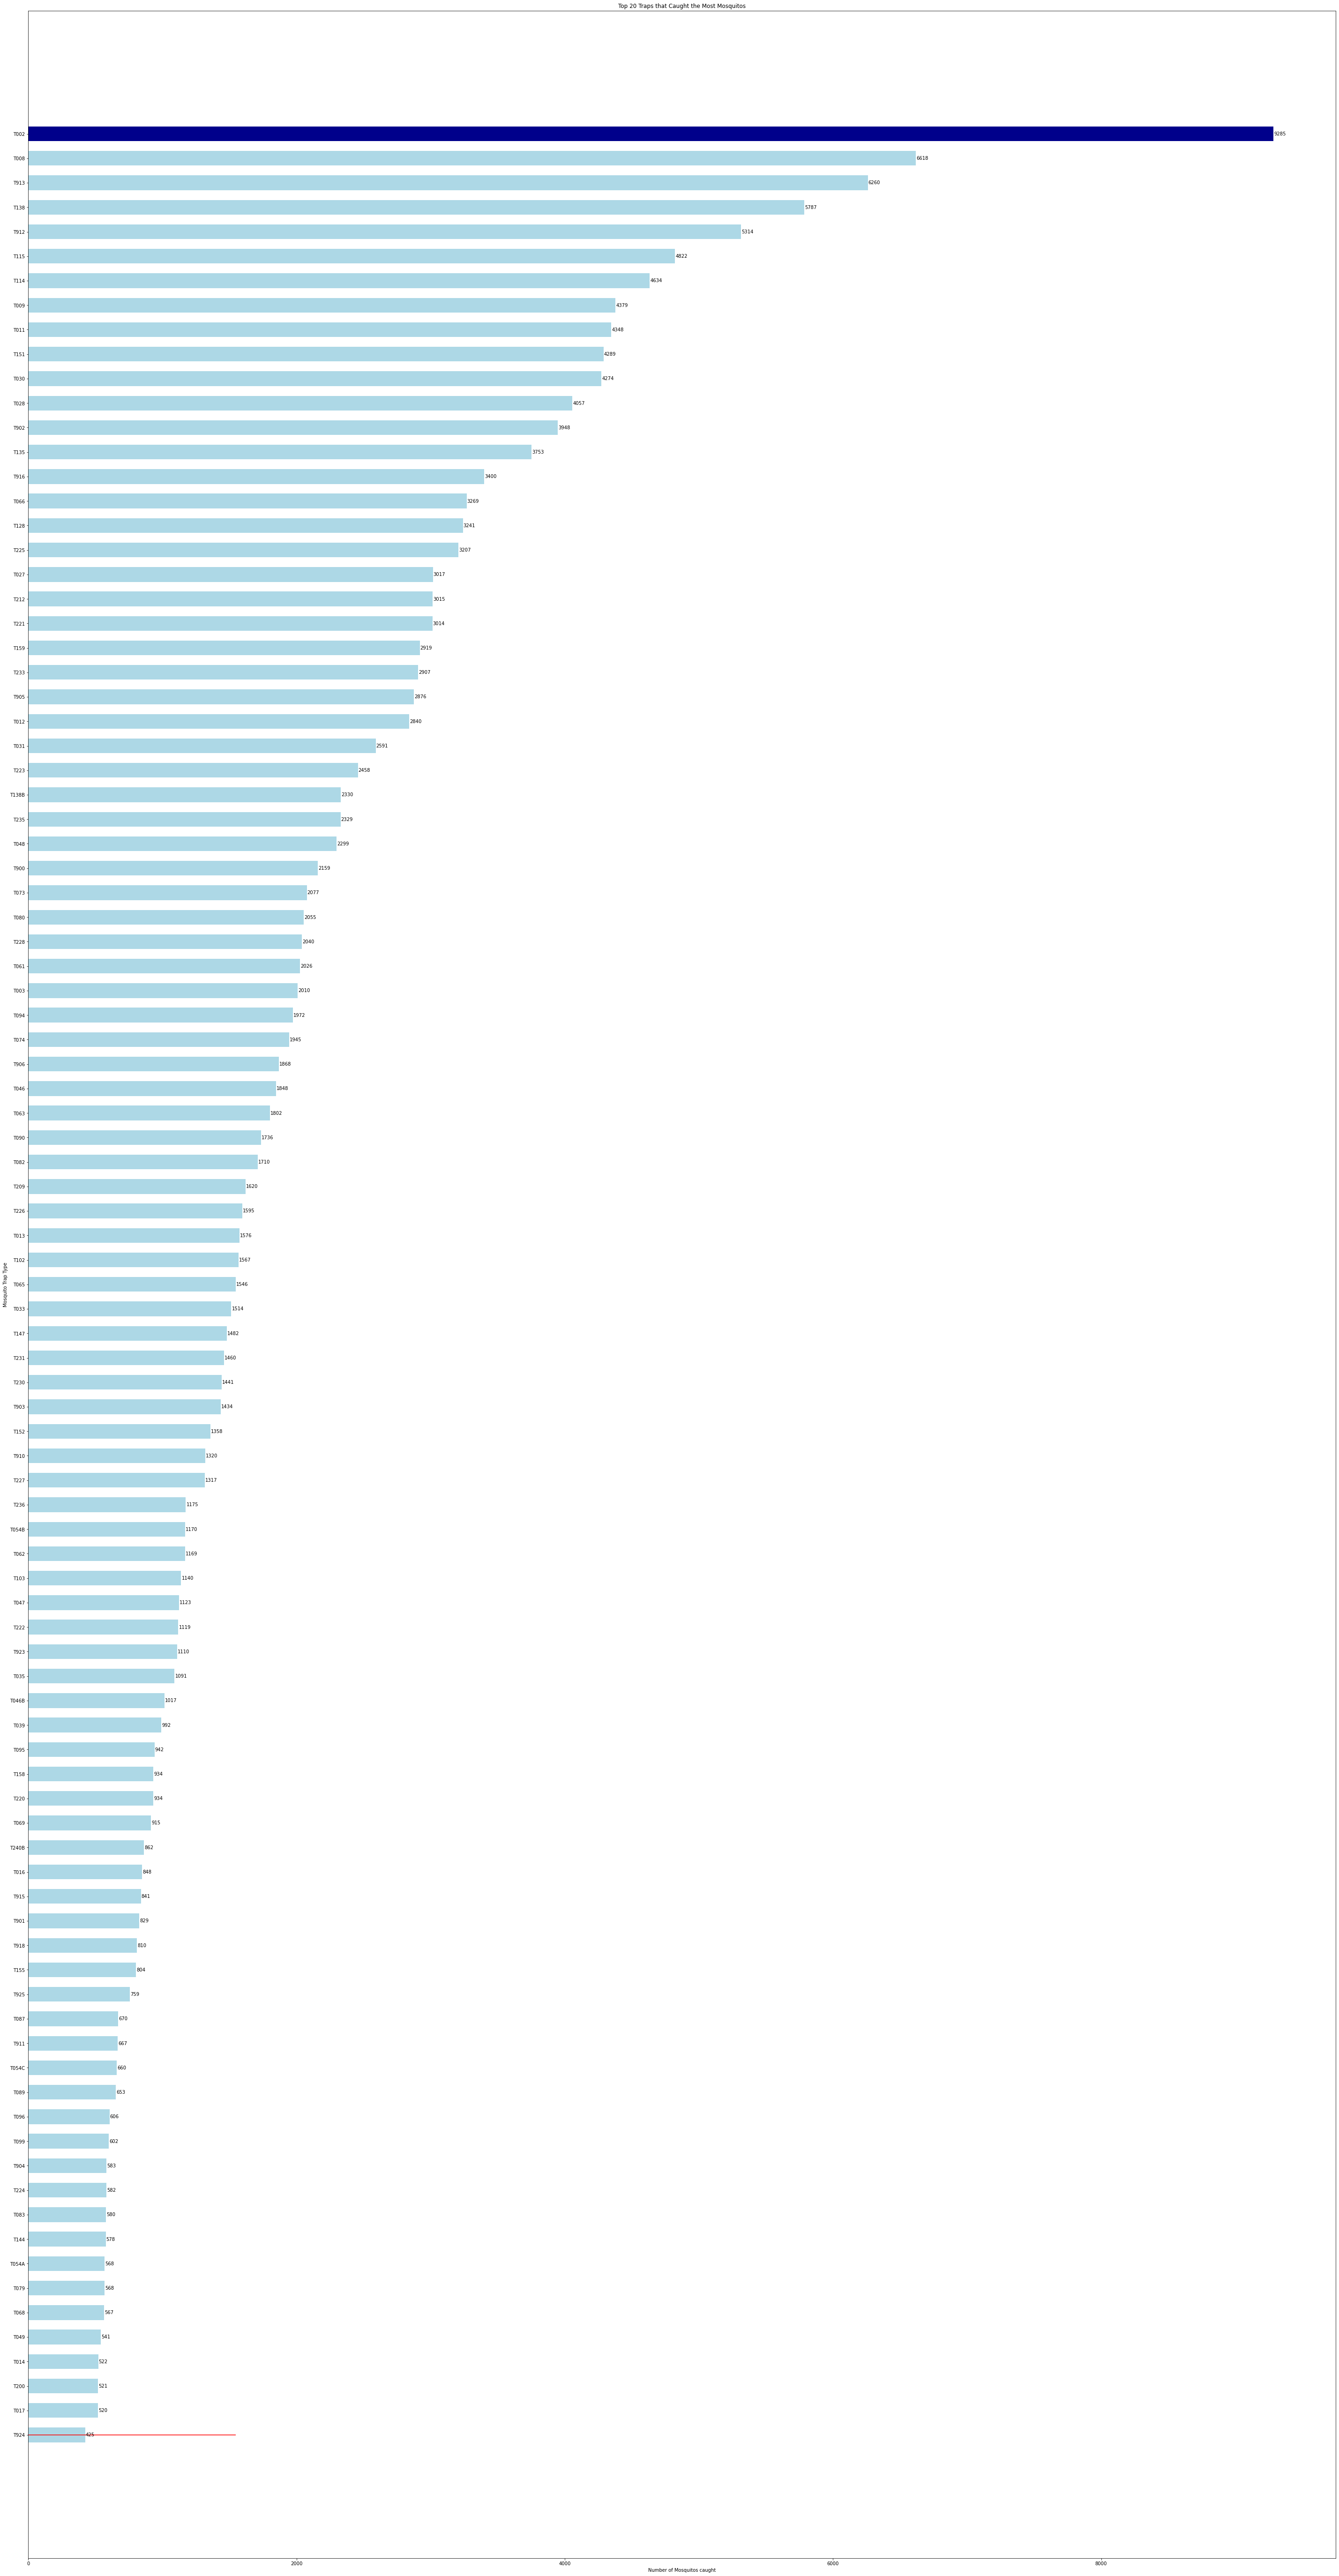

In [28]:
bars = trap_df['Trap']
y_pos = [5*i for i in range(len(bars))]
MosMedian = trap_df[(trap_df['Mosquito number'] >= width.median()) & (trap_df['Mosquito number'] <= width.median())]

plt.figure(figsize = (50, 100))

trapGraph = plt.barh(y_pos, width, height = 3, color = ['darkblue' if z == trap_df['Mosquito number'].max() else 'lightblue' for z in width])

MosMedian = plt.hlines(MosMedian.index, 0, MosMedian['Mosquito number'], color = 'red')

plt.yticks(y_pos, bars)
plt.xlabel("Number of Mosquitos caught")
plt.ylabel("Mosquito Trap Type")
plt.title("Top 20 Traps that Caught the Most Mosquitos")
plt.bar_label(trapGraph, padding = 1)

plt.show()

### Question 3

##### I want to see what WNV Prevelance looks like by location. Where are the mosquitos with WNV Prevelance? Other than being near water, are there any comminites in Chicago being effected by WNV more that others?

Visualization of WNV positive mosquitos over time

In [29]:
wnvPos_df = pd.DataFrame({'Year': mos['Year'].value_counts().index.sort_values(), #create a column for the year and a column for the number of mosquitos with WNV
                           'Mosquito number': mos['Mosquito number'].where(mos['WNV Present'] == 'positive').groupby(mos['Year']).sum()})
wnvPos_df

,Year,Mosquito number
Year,,
2007,2007,11869.0
2008,2008,173.0
2009,2009,134.0
2010,2010,1087.0
2011,2011,757.0
2012,2012,5517.0
2013,2013,10865.0
2014,2014,10782.0
2015,2015,3461.0


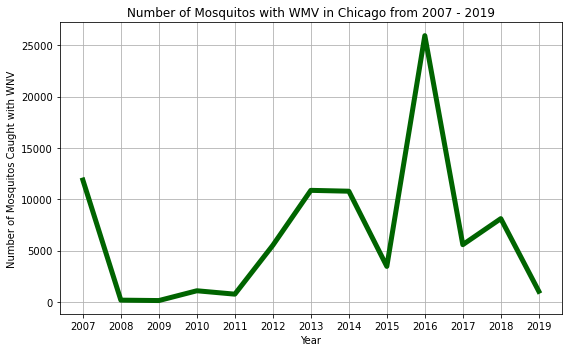

In [30]:
# create time line
plt.figure(figsize = [8, 5], tight_layout = True) #set size and tight_layout 

plt.plot(wnvPos_df['Year'].values, #x-axis is the year
         wnvPos_df['Mosquito number'].values, #y-axis is the number of WNV positive mosquitos
         color = 'darkgreen', 
         linewidth = 5
        )

plt.title('Number of Mosquitos with WMV in Chicago from 2007 - 2019')
plt.xlabel('Year')
plt.ylabel('Number of Mosquitos Caught with WNV')
plt.xticks(wnvPos_df['Year'])

plt.grid('on')

plt.show()

There was 250% increase in WNV positive mosquitos from 2015 to 2016, then 2017 saw decline with even lower numbers than 2015. 2016 was when we saw the rise in mosquitos with Zika virus.

### References

https://www.w3resource.com/pandas/dataframe/dataframe-drop.php

https://datascientyst.com/plot-latitude-longitude-pandas-dataframe-python/

https://stackoverflow.com/questions/24547047/how-to-make-matplotlib-graphs-look-professionally-done-like-

https://www.google.com/search?q=matplotlib+make+graph+look+good&newwindow=1&sxsrf=ALiCzsbpVkFaMi6LE-Dj0GRFjrj2kjNWKQ%3A1659425391865&ei=b9LoYp-xNO6t5NoPx4iYoA0&ved=0ahUKEwjfpI2o0af5AhXuFlkFHUcEBtQQ4dUDCA4&uact=5&oq=matplotlib+make+graph+look+good&gs_lcp=Cgdnd3Mtd2l6EAMyBAgjECc6BwgAEEcQsAM6BQgAEJECOgsIABCABBCxAxCDAToECAAQQzoRCC4QgAQQsQMQgwEQxwEQ0QM6BAguEEM6CggAELEDEIMBEEM6CwgAELEDEIMBEJECOgUIABCABDoICAAQHhAWEAo6BggAEB4QFjoICAAQHhAPEBY6BQgAEIYDSgQIQRgASgQIRhgAUJ8JWM1eYLVgaAtwAXgAgAGBAogBpCSSAQYzLjIxLjeYAQCgAQHIAQjAAQE&sclient=gws-wiz

In [44]:
!jt -t monokai -cursc r -cursw 5

In [32]:

!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl
